In [42]:
from __future__ import division
from numpy import *
%pylab inline
rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [55]:
data = {}
with open('coil-coil-force.csv','r') as datafile:
    for i in range(5):
        datafile.readline() #strip headers
    #magnet_os = [item.split(',')[0] for item in datafile.readline().split('magnet_os=') if item is not ''][1:]
    #magnet_os = 1e6*asarray(map(float,magnet_os))
    #Ns = [10+5*i for i in range(8)]
    #gaps = [300 + 100*i for i in range(6)]
    raw_data = []
    for line in datafile.readlines():
        raw_data.append([float(item) for item in line.strip('\n').split(',') if item is not ''])
    raw_data = asarray(raw_data).reshape(9,6,-1)
    #raw_data = asarray(raw_data)[:,2:].reshape(9,6,-1)

(0, 1.5818192466432821)

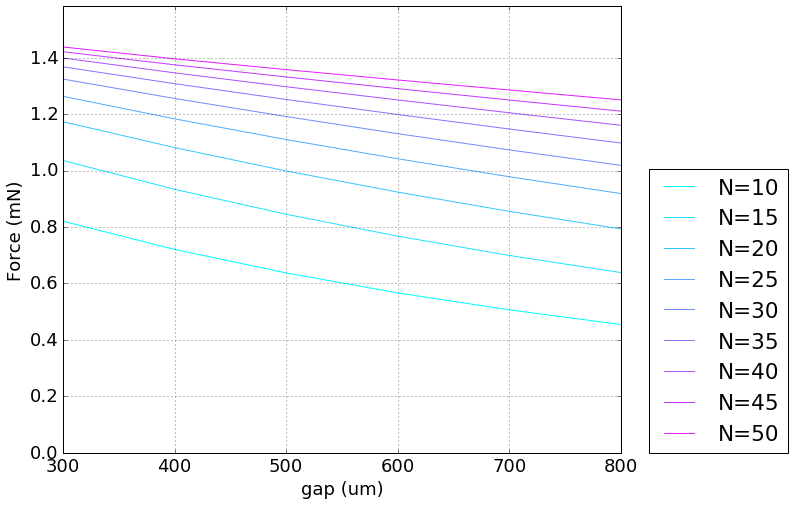

In [58]:
cm = plt.get_cmap('cool')
figure(figsize=(10,8))
for i,series in enumerate(raw_data):
    plot(series[:,1],-1e3*series[:,2],label='N=%d'%(series[0,0]),c=cm(i/len(raw_data)))
legend(loc=(1.05,0))
xlabel('gap (um)')
ylabel('Force (mN)')
grid(True)
ylim([0,-1.1e3*amin(raw_data[:,:,2])])

In [46]:
data = {}
with open('magnet-coil-force.csv','r') as datafile:
    for i in range(5):
        datafile.readline() #strip headers
    #magnet_os = [item.split(',')[0] for item in datafile.readline().split('magnet_os=') if item is not ''][1:]
    #magnet_os = 1e6*asarray(map(float,magnet_os))
    #Ns = [10+5*i for i in range(8)]
    #gaps = [300 + 100*i for i in range(6)]
    raw_data = []
    for line in datafile.readlines():
        raw_data.append([float(item) for item in line.strip('\n').split(',') if item is not ''])
    raw_data = asarray(raw_data).reshape(7,6,-1)
    #raw_data = asarray(raw_data)[:,2:].reshape(9,6,-1)

(0, 0.44002382907818138)

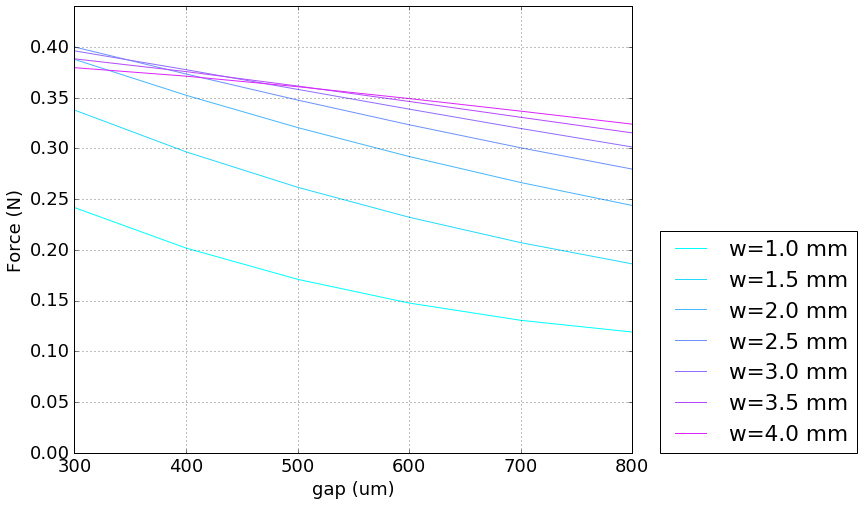

In [54]:
cm = plt.get_cmap('cool')
figure(figsize=(10,8))
for i,series in enumerate(raw_data):
    plot(series[:,1],series[:,2],label='w=%.1f mm'%(series[0,0]),c=cm(i/len(raw_data)))
legend(loc=(1.05,0))
xlabel('gap (um)')
ylabel('Force (N)')
grid(True)
ylim([0,1.1*amax(raw_data[:,:,2])])

In [4]:
cm = plt.get_cmap('cool')
stroke = linspace( amin(magnet_os), amax(magnet_os), 100)
figure(figsize=(12,10),dpi=600)
current_ind = 2
gap_ind = 3
matplotlib.rcParams.update({'font.size': 18})
for i,series in enumerate(raw_data[gap_ind,::-1]):
    f = interp1d(magnet_os, series, kind=3)
    plot(magnet_os,series,ls='',marker='+',c=cm((11-i)/11))
    plot(stroke,f(stroke),label='%.1f A'%(currents[::-1][i]),c=cm((11-i)/11))
#legend(loc=(1.01,.01))
xlabel('stroke (um)')
ylabel('Force (N)')
#title('Linear Motor, %d um gap'%(1e6*gaps[gap_ind]))
ylim([-.15,.3])

NameError: name 'magnet_os' is not defined

In [5]:
cm = plt.get_cmap('cool')
stroke = linspace( amin(magnet_os), amax(magnet_os), 100)
figure(figsize=(12,10))
for i,series in enumerate(raw_data[:,0]):
    z = poly1d(polyfit(magnet_os, series,11))
    plot(magnet_os,series,label='gap=%d um'%(1e6*gaps[i]),ls='',marker='+',c=cm(i/5))
    plot(stroke, z(stroke),c=cm(i/5))
legend(loc='lower right')
xlabel('stroke (um)')
ylabel('X Force (N)')

NameError: name 'magnet_os' is not defined